#Final Project For DS510 Data Science
บทความประกอบ ::
[Can we predict Diabetes from simple survey question with Machine Learning?](https://medium.com/@ratchaphon.rpg/can-we-predict-diabetes-from-simple-survey-question-with-machine-learning-7b1fc167e657)

Member


1.   ณิชารีย์ ศรีบูจันดี 65199160180
2.   นิสิทรา บุญเรือง 65199160187
3.   รัชพล ปรายราย 65199160198
4.   รัฐพร คุณสมบัติ 65199160199



In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load data

In [ ]:
#load CSV file name "diabetes.csv" from google drive
df = pd.read_csv('/content/drive/MyDrive/DS511/diabetes.csv')

In [ ]:
#check head
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#check tail
df.tail(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


# Check and Cleaning

In [ ]:
#check rows and columns
shape = df.shape
print(f"This dataframe have {shape[0]} rows",
      f"This dataframe have {shape[1]} columns", sep="\n")

This dataframe have 253680 rows
This dataframe have 22 columns


In [ ]:
#check missing Value
df.isnull().sum().sum()

0

In [ ]:
#check duplication
df.duplicated().sum()

24206

In [ ]:
#drop duplicates 
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
#recheck duplication again
df.duplicated().sum()

0

In [ ]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [ ]:
for i in df.columns:
  print(i, df[i].unique())

Diabetes_binary [0. 1.]
HighBP [1. 0.]
HighChol [1. 0.]
CholCheck [1. 0.]
BMI [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker [1. 0.]
Stroke [0. 1.]
HeartDiseaseorAttack [0. 1.]
PhysActivity [0. 1.]
Fruits [0. 1.]
Veggies [1. 0.]
HvyAlcoholConsump [0. 1.]
AnyHealthcare [1. 0.]
NoDocbcCost [0. 1.]
GenHlth [5. 3. 2. 4. 1.]
MentHlth [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk [1. 0.]
Sex [0. 1.]
Age [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
Education [4. 6. 

In [ ]:
#check values in each columns and change type to int
for i in df.columns:
  df[i] =  df[i].astype(int)
  print(i, df[i].unique())

Diabetes_binary [0 1]
HighBP [1 0]
HighChol [1 0]
CholCheck [1 0]
BMI [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker [1 0]
Stroke [0 1]
HeartDiseaseorAttack [0 1]
PhysActivity [0 1]
Fruits [0 1]
Veggies [1 0]
HvyAlcoholConsump [0 1]
AnyHealthcare [1 0]
NoDocbcCost [0 1]
GenHlth [5 3 2 4 1]
MentHlth [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk [1 0]
Sex [0 1]
Age [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education [4 6 3 5 2 1]
Income [3 1 8 6 4 7 2 5]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   PhysActivity          229474 non-null  int64
 9   Fruits                229474 non-null  int64
 10  Veggies               229474 non-null  int64
 11  HvyAlcoholConsump     229474 non-null  int64
 12  AnyHealthcare         229474 non-null  int64
 13  NoDocbcCost           229474 non-null  int64
 14  GenHlth               229474 non-null  int64
 15  MentHlth              229474 non-n

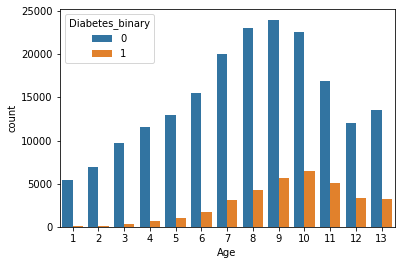

In [ ]:
sns.countplot(data=df, x="Age", hue="Diabetes_binary")

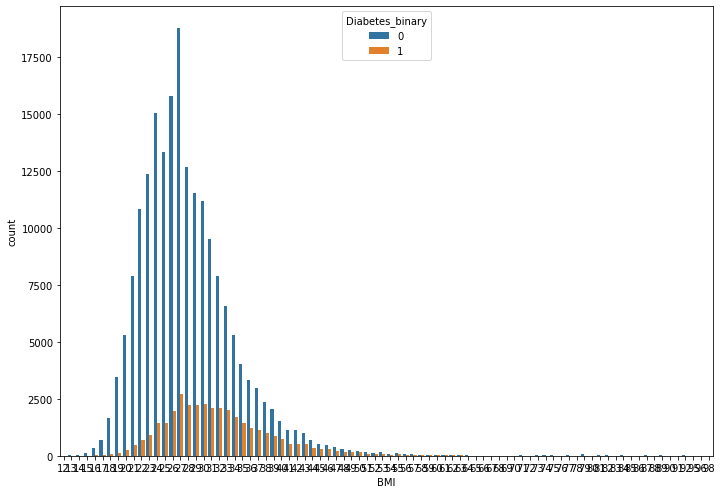

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(data=df, x="BMI", hue="Diabetes_binary")

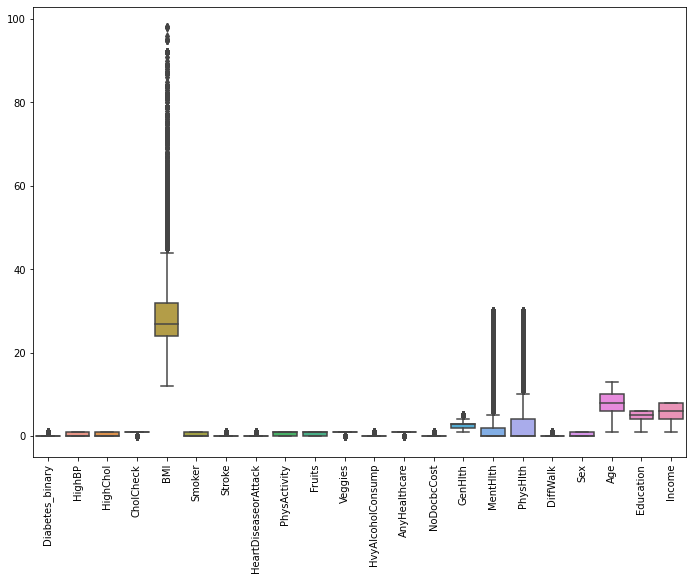

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

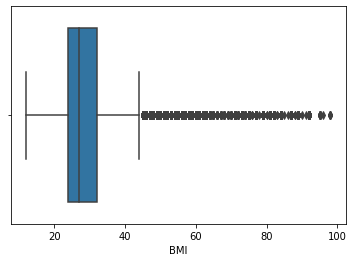

In [ ]:
#Box plot for BMI column
sns.boxplot(data=df, x='BMI')

In [ ]:
df = df[df['BMI']<=70]
print(df['BMI'].max(), df['BMI'].min())

70 12


In [ ]:
Q1,Q3 = np.percentile(df['BMI'] , [25,75])
IQR = Q3-Q1
upper_lim = Q3+(1.5*IQR)
lower_lim = Q1-(1.5*IQR)
print(upper_lim, lower_lim)

44.0 12.0


In [ ]:
#Adult Body Mass Index from CDC
def tranform_bmi(x):
    if x < 18.5 :
        return "underweight"
    elif 18.5 <= x <= 24.9 :
        return "healthy weight"
    elif 25 <= x <= 29.9 :
        return "overweight "
    elif 30 <= x <= 34.9 :
        return "obesity_calss1"
    elif 35 <= x <= 39.9 :
        return "obesity_class2"
    elif x>=40:
        return 'obesity_class3'    

In [ ]:
df['bmi_cath'] = df['BMI'].apply(tranform_bmi)

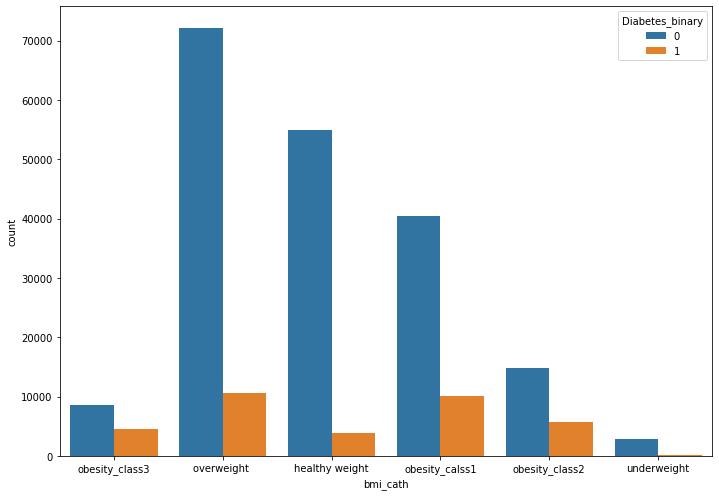

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(data=df, x="bmi_cath", hue="Diabetes_binary")

In [ ]:
use = df.copy()

In [ ]:
for i in use.columns:
  print(i, df[i].unique())

Diabetes_binary [0 1]
HighBP [1 0]
HighChol [1 0]
CholCheck [1 0]
BMI [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 62 64 66 60 67 65 70 68 13 12 69]
Smoker [1 0]
Stroke [0 1]
HeartDiseaseorAttack [0 1]
PhysActivity [0 1]
Fruits [0 1]
Veggies [1 0]
HvyAlcoholConsump [0 1]
AnyHealthcare [1 0]
NoDocbcCost [0 1]
GenHlth [5 3 2 4 1]
MentHlth [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk [1 0]
Sex [0 1]
Age [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education [4 6 3 5 2 1]
Income [3 1 8 6 4 7 2 5]
bmi_cath ['obesity_class3' 'overweight ' 'healthy weight' 'obesity_calss1'
 'obesity_class2' 'underweight']


In [ ]:
df.loc[:,"HighBP"][df['HighBP'] == 0] = 'No HT'
df.loc[:,"HighBP"][df['HighBP'] == 1] = 'HT'
df.loc[:,"HighChol"][df['HighChol'] == 0] = 'Not High Cholesterol'
df.loc[:,"HighChol"][df['HighChol'] == 1] = 'High Cholesterol'
df.loc[:,"CholCheck"][df['CholCheck'] == 1] = 'Yes'
df.loc[:,"CholCheck"][df['CholCheck'] == 0] = 'No'
df.loc[:,"Smoker"][df['Smoker'] == 0] = 'No Smoker'
df.loc[:,"Smoker"][df['Smoker'] == 1] = 'Smoker'
df.loc[:,"Stroke"][df['Stroke'] == 0] = 'No Stroke'
df.loc[:,"Stroke"][df['Stroke'] == 1] = 'Stroke'
df.loc[:,"HeartDiseaseorAttack"][df['HeartDiseaseorAttack'] == 1] = 'Yes'
df.loc[:,"HeartDiseaseorAttack"][df['HeartDiseaseorAttack'] == 0] = 'No'
df.loc[:,"PhysActivity"][df['PhysActivity'] == 1] = 'Yes'
df.loc[:,"PhysActivity"][df['PhysActivity'] == 0] = 'No'
df.loc[:,"Fruits"][df['Fruits'] == 1] = 'Yes'
df.loc[:,"Fruits"][df['Fruits'] == 0] = 'No'
df.loc[:,"Veggies"][df['Veggies'] == 1] = 'Yes'
df.loc[:,"Veggies"][df['Veggies'] == 0] = 'No'
df.loc[:,"HvyAlcoholConsump"][df['HvyAlcoholConsump'] == 0] = 'No'
df.loc[:,"HvyAlcoholConsump"][df['HvyAlcoholConsump'] == 1] = 'Yes'
df.loc[:,"AnyHealthcare"][df['AnyHealthcare'] == 1] = 'Yes'
df.loc[:,"AnyHealthcare"][df['AnyHealthcare'] == 0] = 'No'
df.loc[:,"NoDocbcCost"][df['NoDocbcCost'] == 1] = 'Yes'
df.loc[:,"NoDocbcCost"][df['NoDocbcCost'] == 0] = 'No'
df.loc[:,"GenHlth"][df['GenHlth'] == 1] = 'Excellent'
df.loc[:,"GenHlth"][df['GenHlth'] == 2] = 'Very Good'
df.loc[:,"GenHlth"][df['GenHlth'] == 3] = 'Good'
df.loc[:,"GenHlth"][df['GenHlth'] == 4] = 'Fair'
df.loc[:,"GenHlth"][df['GenHlth'] == 5] = 'Poor'
df.loc[:,"DiffWalk"][df['DiffWalk'] == 0] = 'No'
df.loc[:,"DiffWalk"][df['DiffWalk'] == 1] = 'Yes'
df.loc[:,"Sex"][df['Sex'] == 0] = 'Female'
df.loc[:,"Sex"][df['Sex'] == 1] = 'male'
df.loc[:,"Education"][df['Education'] == 1] = 'Never Attended School'
df.loc[:,"Education"][df['Education'] == 2] = 'Elementary'
df.loc[:,"Education"][df['Education'] == 3] = 'Some high school'
df.loc[:,"Education"][df['Education'] == 4] = 'High school graduated'
df.loc[:,"Education"][df['Education'] == 5] = 'Some college'
df.loc[:,"Education"][df['Education'] == 6] = 'college graduated'
df.loc[:,"Income"][df['Income'] == 1] = '< $10000'
df.loc[:,"Income"][df['Income'] == 2] = '< $15000'
df.loc[:,"Income"][df['Income'] == 3] = '< $20000'
df.loc[:,"Income"][df['Income'] == 4] = '< $25000'
df.loc[:,"Income"][df['Income'] == 5] = '< $35000'
df.loc[:,"Income"][df['Income'] == 6] = '< $50000'
df.loc[:,"Income"][df['Income'] == 7] = '< $75000'
df.loc[:,"Income"][df['Income'] == 8] = '>= $75000'
df.loc[:,"Age"][df['Age'] == 1] = '18-24'
df.loc[:,"Age"][df['Age'] == 2] = '25-29'
df.loc[:,"Age"][df['Age'] == 3] = '30-34'
df.loc[:,"Age"][df['Age'] == 4] = '35-39'
df.loc[:,"Age"][df['Age'] == 5] = '40-44'
df.loc[:,"Age"][df['Age'] == 6] = '45-49'
df.loc[:,"Age"][df['Age'] == 7] = '50-54'
df.loc[:,"Age"][df['Age'] == 8] = '55-59'
df.loc[:,"Age"][df['Age'] == 9] = '60-64'
df.loc[:,"Age"][df['Age'] == 10] = '65-69'
df.loc[:,"Age"][df['Age'] == 11] = '70-74'
df.loc[:,"Age"][df['Age'] == 12] = '75-79'
df.loc[:,"Age"][df['Age'] == 13] = '>=80'

<ipython-input-30-3db291abbc6d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-30-3db291abbc6d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-30-3db291abbc6d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


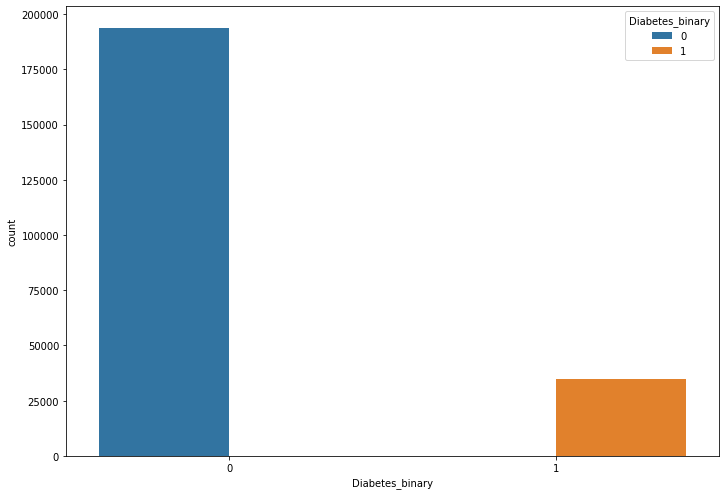

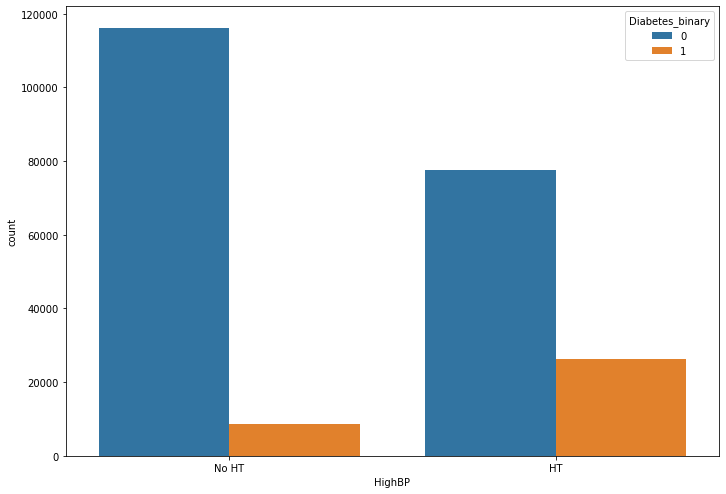

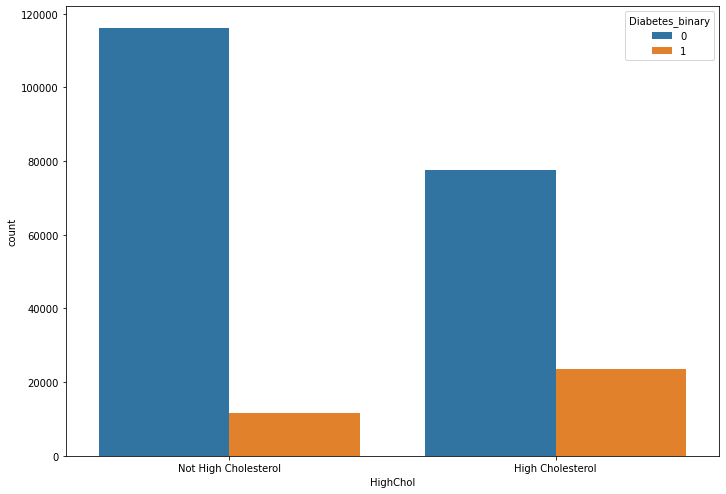

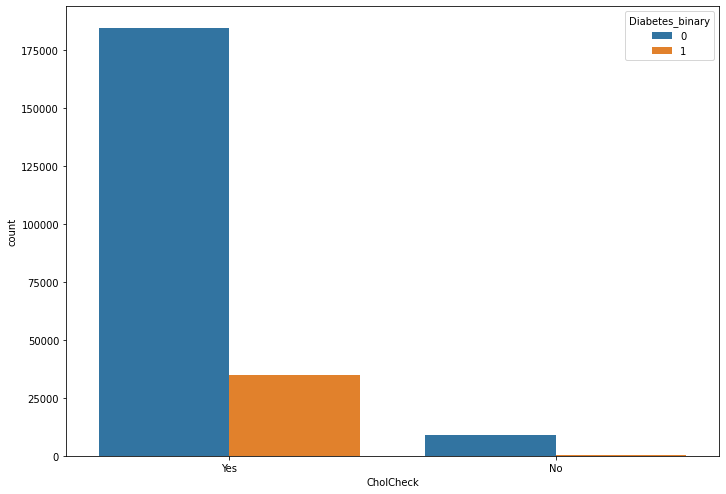

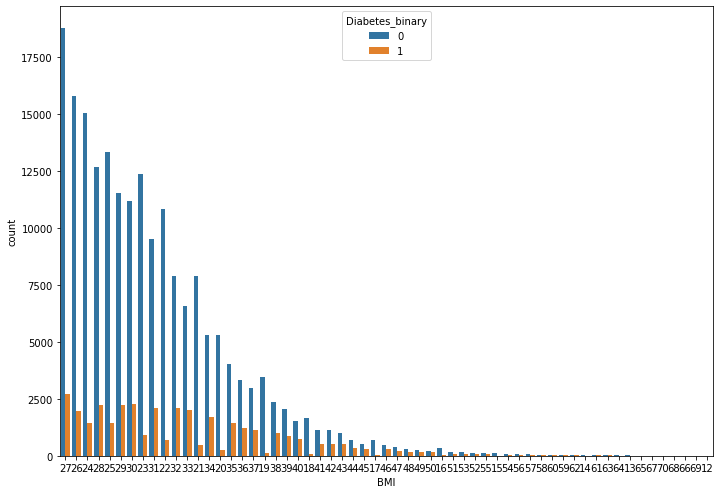

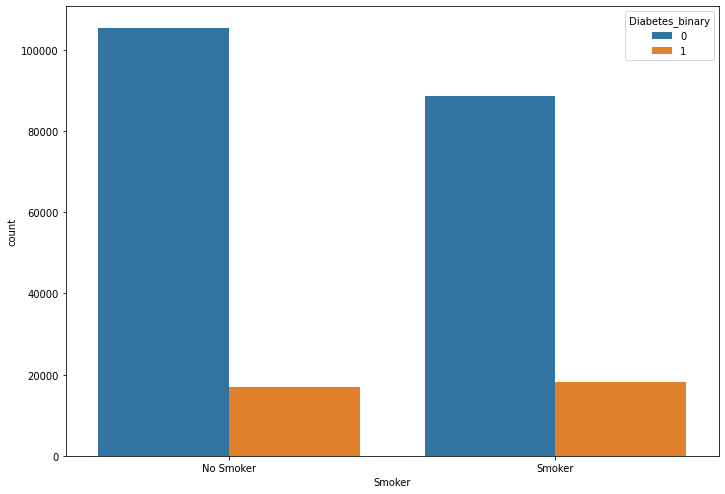

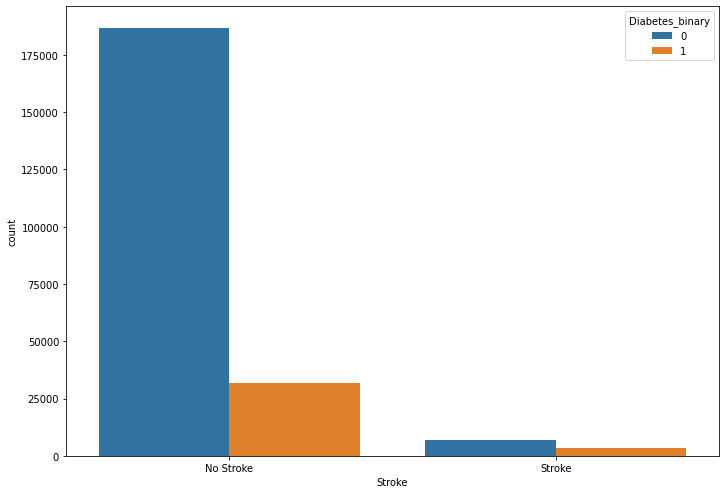

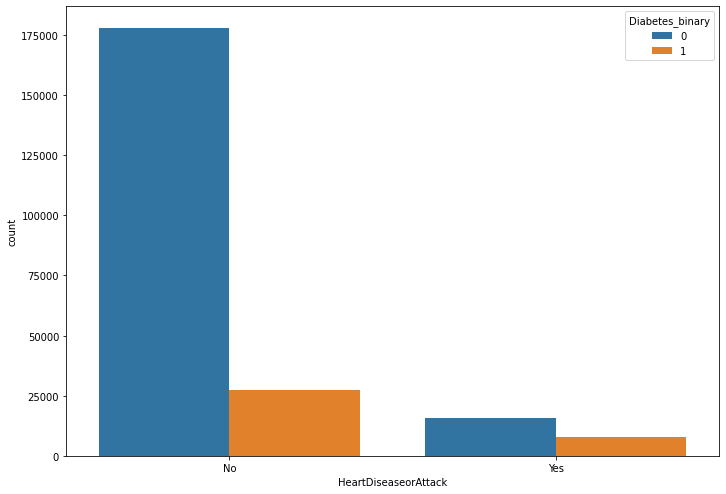

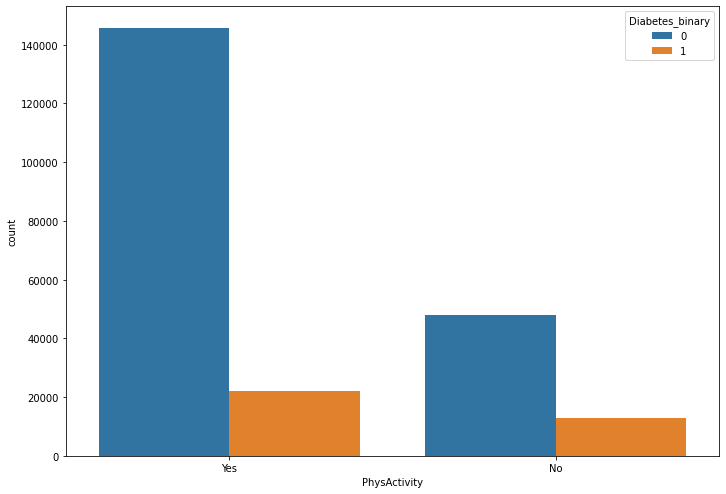

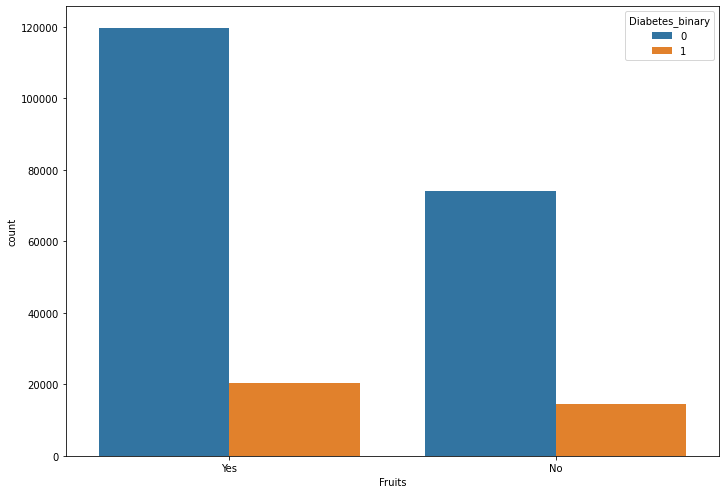

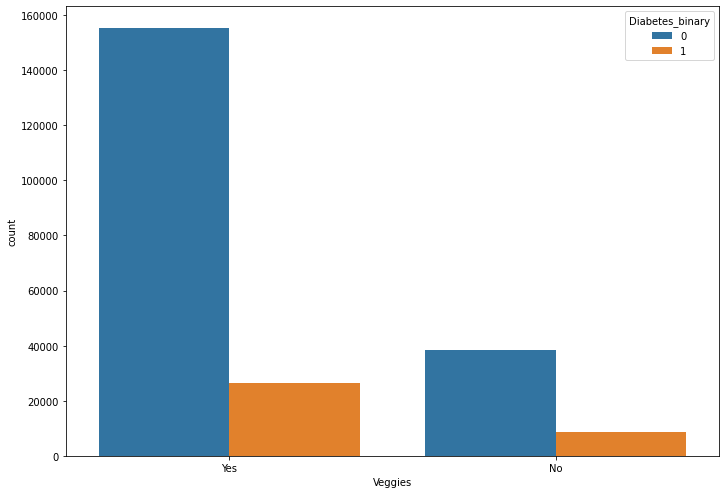

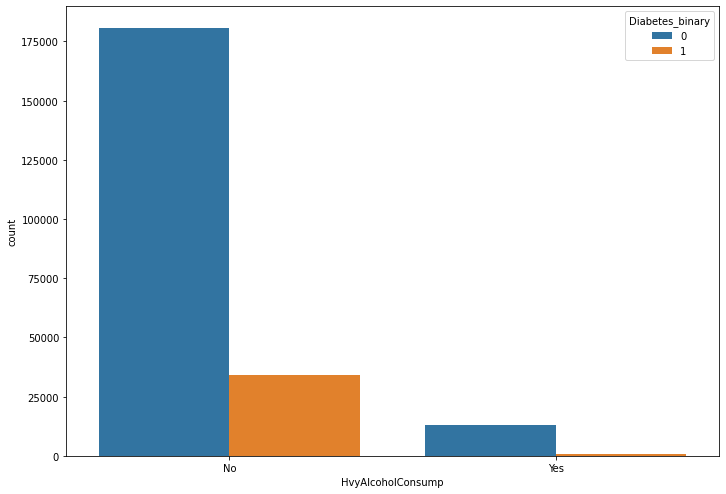

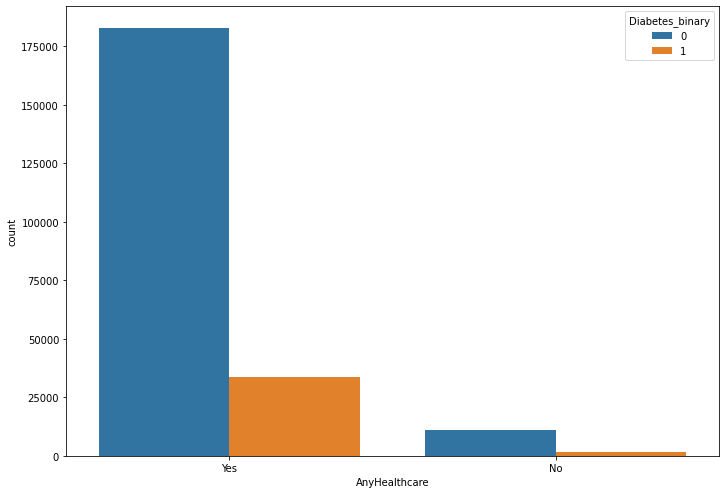

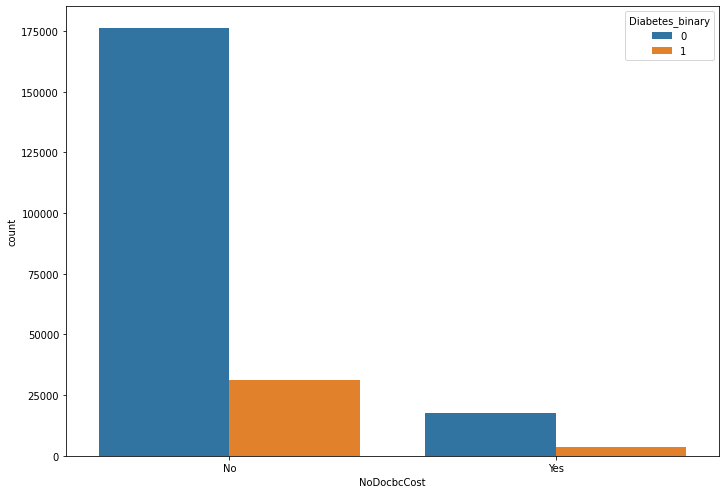

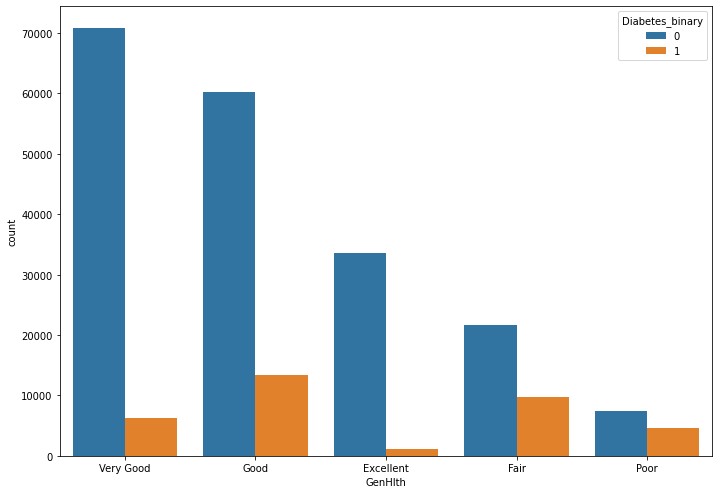

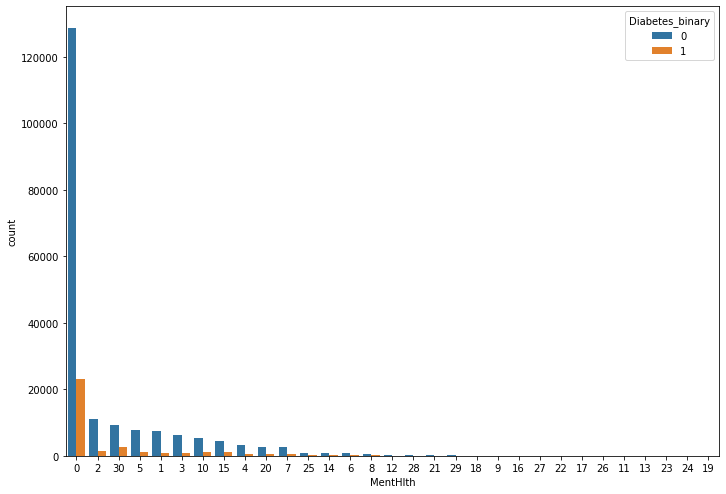

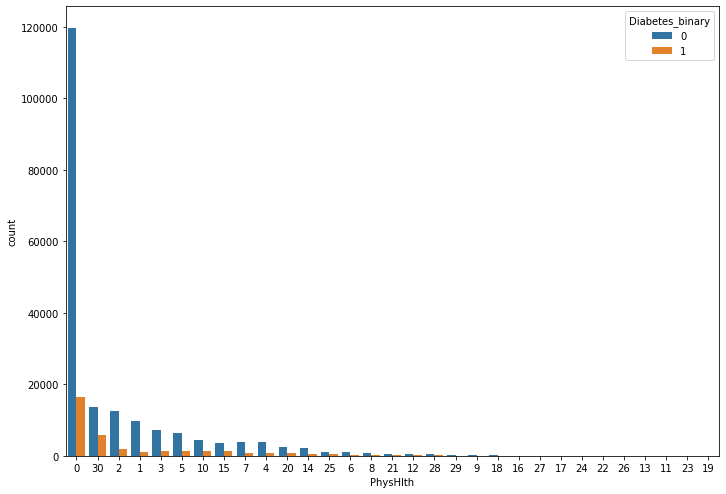

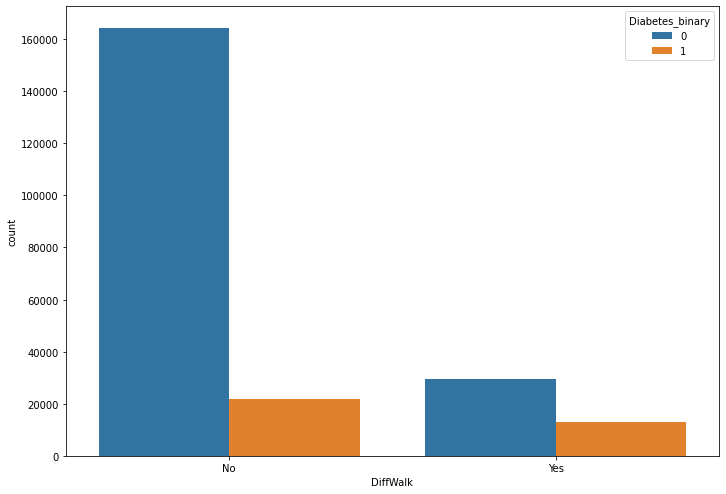

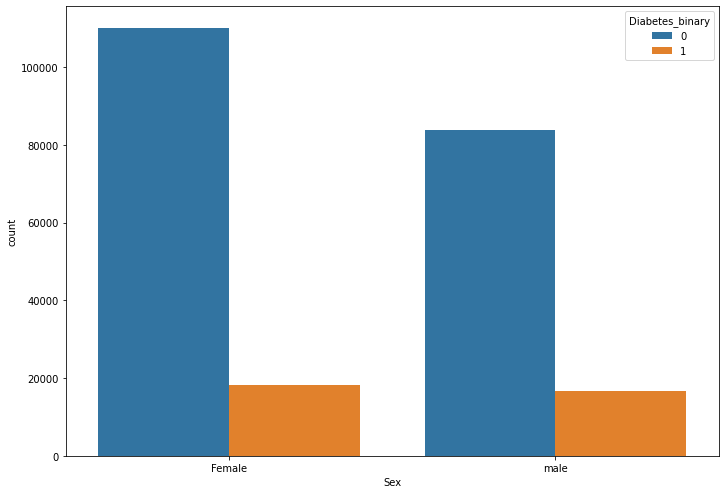

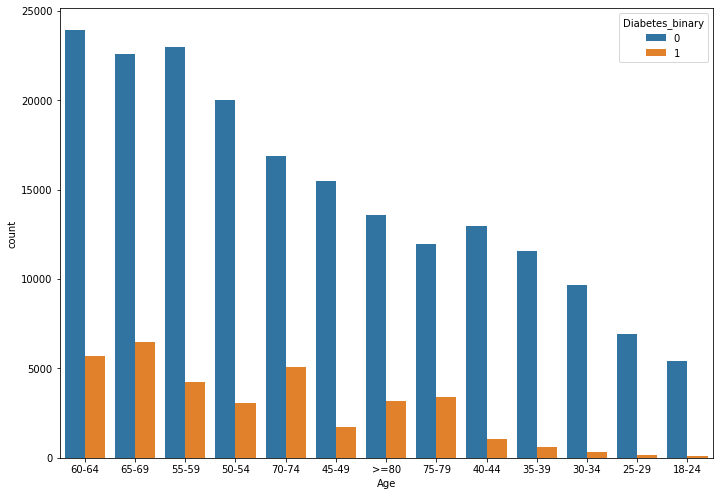

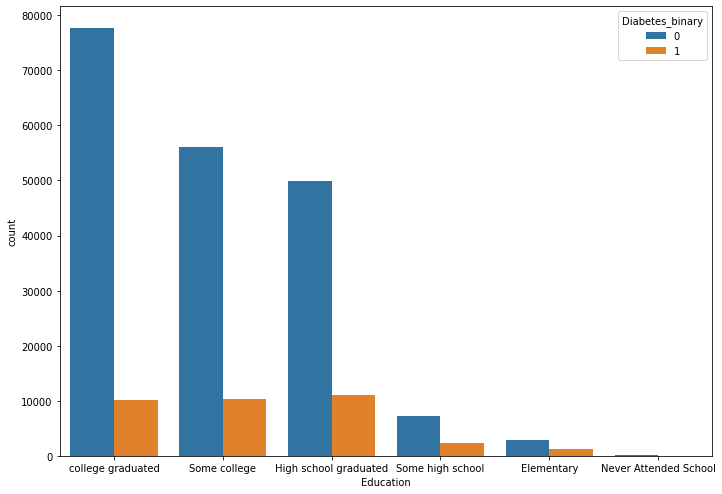

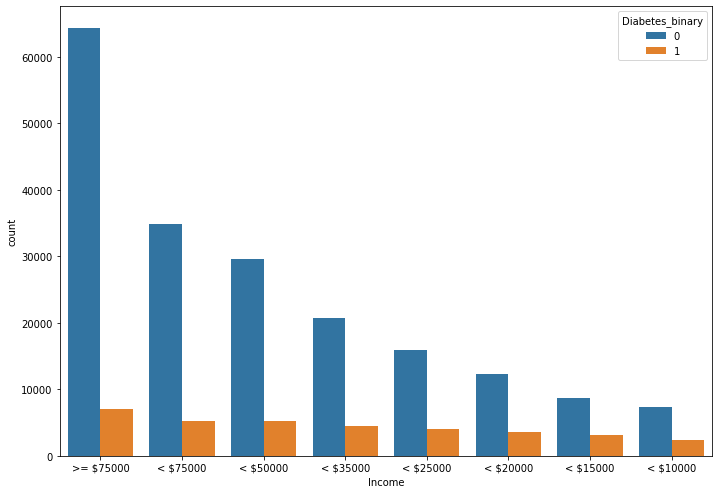

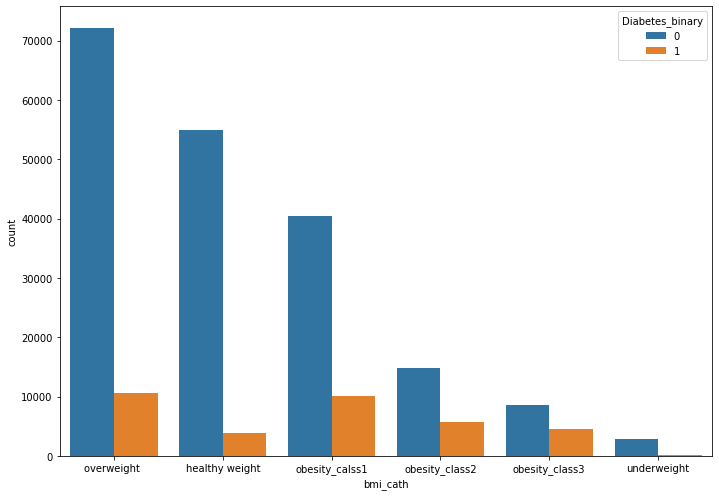

In [ ]:
for name in df.columns:  
  abs_values = df[name].value_counts(ascending=False).values
  fig, ax = plt.subplots() 
  fig.set_size_inches(11.7, 8.27)
  sns.countplot(data=df, x=name, hue="Diabetes_binary", order=df[name].value_counts().index)
  plt.savefig(name)

In [ ]:
use.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.254175,0.194999,0.072545,0.224033,0.045568,0.099109,0.168112,-0.100131,-0.024711,...,0.025496,0.019763,0.276685,0.053909,0.155633,0.204980,0.032923,0.177290,-0.102686,-0.140285
HighBP,0.254175,1.000000,0.283998,0.111218,0.213453,0.074355,0.124473,0.201366,-0.104250,-0.019367,...,0.052006,0.002069,0.272464,0.037214,0.144301,0.211430,0.047245,0.339740,-0.112551,-0.139590
HighChol,0.194999,0.283998,1.000000,0.094895,0.098314,0.074367,0.089452,0.176586,-0.063394,-0.026208,...,0.052427,0.002981,0.188005,0.050168,0.110898,0.136059,0.022861,0.263668,-0.049904,-0.061914
CholCheck,0.072545,0.111218,0.094895,1.000000,0.044968,-0.003576,0.027960,0.050108,-0.004642,0.017855,...,0.115572,-0.054214,0.063076,-0.001519,0.040715,0.049077,-0.024461,0.096142,-0.009893,0.001936
BMI,0.224033,0.213453,0.098314,0.044968,1.000000,-0.007538,0.013203,0.045519,-0.136839,-0.070943,...,-0.006906,0.049816,0.227804,0.074678,0.111769,0.197488,0.032890,-0.044600,-0.084134,-0.077254
Smoker,0.045568,0.074355,0.074367,-0.003576,-0.007538,1.000000,0.054483,0.105212,-0.066835,-0.061521,...,-0.013990,0.037459,0.134931,0.077590,0.100496,0.108340,0.096567,0.107631,-0.135638,-0.095456
Stroke,0.099109,0.124473,0.089452,0.027960,0.013203,0.054483,1.000000,0.198826,-0.059244,-0.004519,...,0.013513,0.028505,0.169730,0.062015,0.140707,0.169270,0.003729,0.128112,-0.064098,-0.117117
HeartDiseaseorAttack,0.168112,0.201366,0.176586,0.050108,0.045519,0.105212,0.198826,1.000000,-0.073079,-0.007006,...,0.025886,0.021860,0.246361,0.052471,0.170185,0.202618,0.090058,0.223857,-0.082313,-0.122475
PhysActivity,-0.100131,-0.104250,-0.063394,-0.004642,-0.136839,-0.066835,-0.059244,-0.073079,1.000000,0.124770,...,0.023797,-0.046209,-0.237311,-0.105578,-0.198918,-0.235415,0.033397,-0.087966,0.171046,0.165612
Fruits,-0.024711,-0.019367,-0.026208,0.017855,-0.070943,-0.061521,-0.004519,-0.007006,0.124770,1.000000,...,0.022600,-0.032414,-0.070993,-0.052031,-0.024233,-0.029639,-0.088625,0.073521,0.084744,0.050680


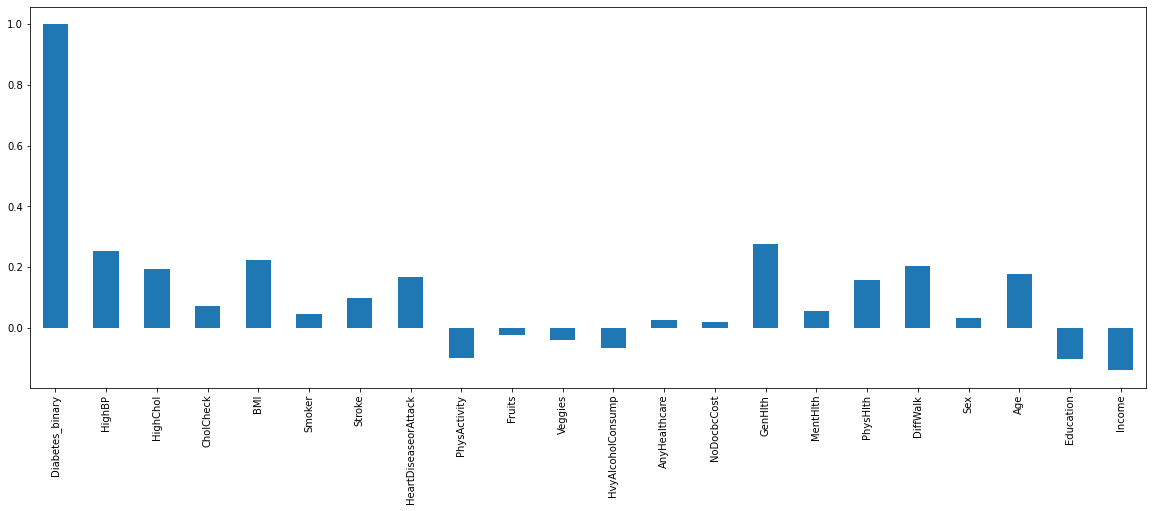

In [ ]:
use.corrwith(use['Diabetes_binary']).plot(kind='bar', figsize=(20,7))

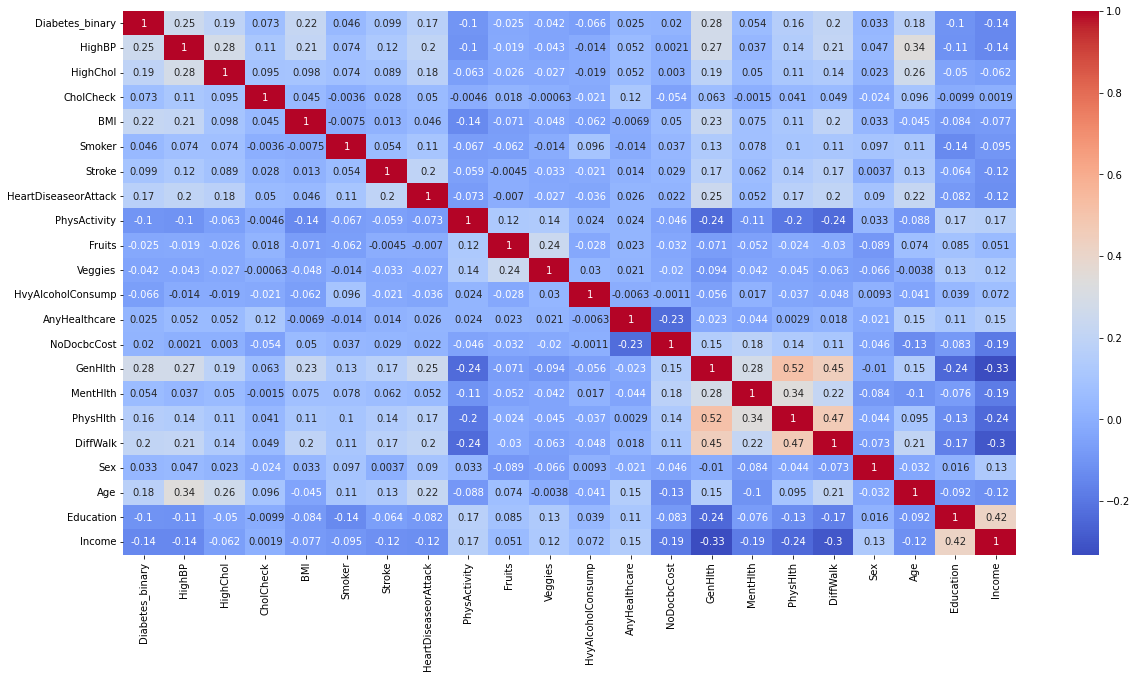

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(use.corr(),annot=True , cmap ='coolwarm' )

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


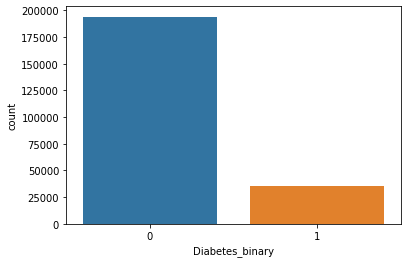

In [ ]:
sns.countplot(use['Diabetes_binary'])

In [ ]:
dm =  use[use['Diabetes_binary']==1].shape[0]
non_dm = use[use['Diabetes_binary']==0].shape[0]
percent = (dm/(dm+non_dm))*100
print("DM is about {} rows".format(dm))
print("Non-dm is about {} rows".format(non_dm))
print("In this data set DM is about {:.3f} % of all rows".format(percent))

DM is about 35021 rows
Non-dm is about 193869 rows
In this data set DM is about 15.300 % of all rows


# Train Model

In [ ]:
#Try train model
use.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'bmi_cath'],
      dtype='object')

In [ ]:
#one hot encoding for bmi_cath
dummies = pd.get_dummies(use['bmi_cath'])
use_onehot = pd.concat([use, dummies],axis=1)

In [ ]:
use_onehot.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'bmi_cath', 'healthy weight', 'obesity_calss1', 'obesity_class2',
       'obesity_class3', 'overweight ', 'underweight'],
      dtype='object')

In [ ]:
#Train Test Splits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, plot_roc_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
#Define Fetures and Labels
y = use_onehot["Diabetes_binary"]
X = use_onehot.drop(["Diabetes_binary","bmi_cath","BMI"], axis =1) 

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=99, stratify=y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


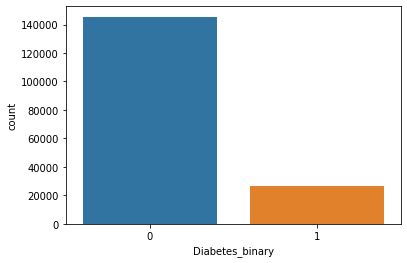

In [ ]:
sns.countplot(y_train)

# Logistic Regression 
All features with Onehot Encodnig ON BMI category

In [ ]:
logreg = LogisticRegression(max_iter=1500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1500)

In [ ]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8516
Test set score: 0.8515


              precision    recall  f1-score   support

           0       0.87      0.98      0.92     38774
           1       0.55      0.16      0.25      7004

    accuracy                           0.85     45778
   macro avg       0.71      0.57      0.58     45778
weighted avg       0.82      0.85      0.82     45778



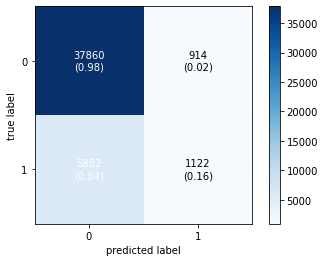

In [ ]:
from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from mlxtend.plotting import plot_confusion_matrix
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

#KNN ckassification
All features with Onehot Encodnig ON BMI category



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred=knn.predict(X_test)
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8723
Test set score: 0.8393


              precision    recall  f1-score   support

           0       0.86      0.97      0.91     38774
           1       0.40      0.10      0.17      7004

    accuracy                           0.84     45778
   macro avg       0.63      0.54      0.54     45778
weighted avg       0.79      0.84      0.80     45778



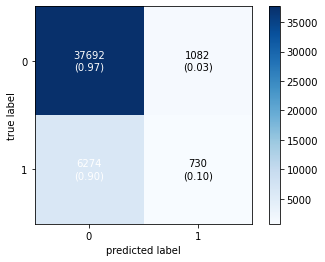

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

#Dealing with imbalanced data use SMOTE for over-sampling

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42,sampling_strategy='minority')
X_r, y_r = sm.fit_resample(X_train, y_train)

In [ ]:
y_r

0         0
1         1
2         0
3         0
4         0
         ..
290797    1
290798    1
290799    1
290800    1
290801    1
Name: Diabetes_binary, Length: 290802, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


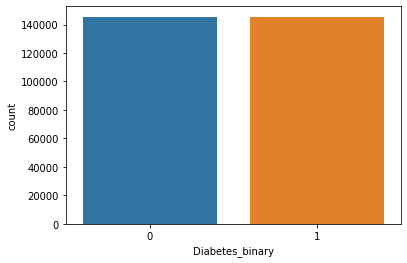

In [ ]:
sns.countplot(y_r)

# Logistic Regression 
# SMOTE
All features with Onehot Encodnig ON BMI category



In [ ]:
logreg = LogisticRegression(max_iter=1500)
logreg.fit(X_r, y_r)
print('Training set score: {:.4f}'.format(logreg.score(X_r, y_r)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7563
Test set score: 0.7374


              precision    recall  f1-score   support

           0       0.92      0.76      0.83     48468
           1       0.32      0.64      0.43      8755

    accuracy                           0.74     57223
   macro avg       0.62      0.70      0.63     57223
weighted avg       0.83      0.74      0.77     57223



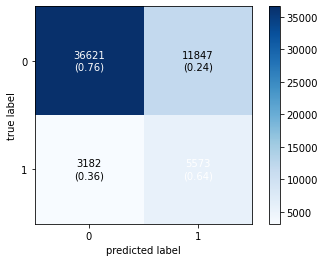

In [ ]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

#KNN ckassification
#SMOTE
All features with Onehot Encodnig ON BMI category



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_r , y_r)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred=knn.predict(X_test)
print('Training set score: {:.4f}'.format(knn.score(X_r, y_r)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9119
Test set score: 0.7153


              precision    recall  f1-score   support

           0       0.89      0.76      0.82     48468
           1       0.26      0.47      0.34      8755

    accuracy                           0.72     57223
   macro avg       0.57      0.62      0.58     57223
weighted avg       0.79      0.72      0.74     57223



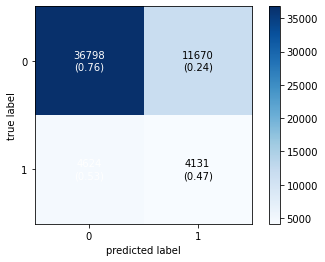

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'bmi_cath'],
      dtype='object')

#Selected Features using correlation
HighBP, HighChol, BMI, HeartDiseaseorAttack, PhysActivity, GenHlth, PhysHlth, DiffWalk, Age

ใช้ One Hot encoding กับ Genlth, Age, bmi_cath เนื่องจากเป็น Discreate Value

In [ ]:
selected_df = df[['Diabetes_binary', 'HighBP', 'HighChol', 'HeartDiseaseorAttack', 
                  'PhysActivity', 'GenHlth', 'PhysHlth',
                  'DiffWalk', 'Age', 'bmi_cath']]

In [ ]:
selected_df.head(1)

,Diabetes_binary,HighBP,HighChol,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,bmi_cath
0,0,HT,High Cholesterol,No,No,Poor,15,Yes,60-64,obesity_class3


In [ ]:
#One hot Encoding for GenHlth,Age,bmi_cath
dum_GenHlth = pd.get_dummies(selected_df['GenHlth'])
dum_Age = pd.get_dummies(selected_df['Age'])
dum_bmi = pd.get_dummies(selected_df['bmi_cath'])
selected_onehot = pd.concat([selected_df, dum_GenHlth], axis=1)
selected_onehot = pd.concat([selected_onehot, dum_Age], axis =1)
selected_onehot = pd.concat([selected_onehot, dum_bmi], axis=1)

In [ ]:
selected_onehot.drop(['GenHlth','Age','bmi_cath'],axis =1,inplace=True)

In [ ]:
selected_onehot

,Diabetes_binary,HighBP,HighChol,HeartDiseaseorAttack,PhysActivity,PhysHlth,DiffWalk,Excellent,Fair,Good,...,65-69,70-74,75-79,>=80,healthy weight,obesity_calss1,obesity_class2,obesity_class3,overweight,underweight
0,0,HT,High Cholesterol,No,No,15,Yes,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,No HT,Not High Cholesterol,No,Yes,0,No,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,HT,High Cholesterol,No,No,30,Yes,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,HT,Not High Cholesterol,No,Yes,0,No,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,HT,High Cholesterol,No,Yes,0,No,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,HT,High Cholesterol,No,No,5,No,0,0,1,...,0,0,0,0,0,0,0,1,0,0
253676,1,HT,High Cholesterol,No,No,0,Yes,0,1,0,...,0,1,0,0,0,0,0,0,0,1
253677,0,No HT,Not High Cholesterol,No,Yes,0,No,1,0,0,...,0,0,0,0,0,0,0,0,1,0
253678,0,HT,Not High Cholesterol,No,No,0,No,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#แปลง Features อื่นๆที่ยังเป็น str และมีเพียง 2 category เป็น 0,1
selected_onehot.loc[:,"HighBP"][selected_onehot['HighBP'] == "HT"] = 1
selected_onehot.loc[:,"HighBP"][selected_onehot['HighBP'] == "No HT"] = 0
selected_onehot.loc[:,"HighChol"][selected_onehot['HighChol'] == "High Cholesterol"] = 1
selected_onehot.loc[:,"HighChol"][selected_onehot['HighChol'] == "Not High Cholesterol"] = 0
selected_onehot.loc[:,"HeartDiseaseorAttack"][selected_onehot['HeartDiseaseorAttack'] == "No"] = 0
selected_onehot.loc[:,"HeartDiseaseorAttack"][selected_onehot['HeartDiseaseorAttack'] == "Yes"] = 1
selected_onehot.loc[:,"PhysActivity"][selected_onehot['PhysActivity'] == "No"] = 0
selected_onehot.loc[:,"PhysActivity"][selected_onehot['PhysActivity'] == "Yes"] = 1
selected_onehot.loc[:,"DiffWalk"][selected_onehot['DiffWalk'] == "No"] = 0
selected_onehot.loc[:,"DiffWalk"][selected_onehot['DiffWalk'] == "Yes"] = 1

In [ ]:
#เนื่องจาก PhysHlth มีความเป็น Decimal มีระยะห่างของค่าเข้ามาเกี่ยวข้อง จึงใช้ StandardScaler เข้ามาช่วย
mean = selected_onehot["PhysHlth"].mean()
sd = selected_onehot["PhysHlth"].std()
selected_onehot['PhysHlth'] = (selected_onehot['PhysHlth']-mean)/sd

In [ ]:
#ลองเช็คค่าขอวทุก columns อีกครั้ง
for col in selected_onehot.columns:
  print(selected_onehot[col].unique())

[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[ 1.14014741 -0.51727219  2.79756701 -0.29628291  1.02965277  2.57657773
  0.25619029  1.69262061 -0.18578827  0.58767421 -0.40677755  0.03520101
  1.36113669 -0.07529363  1.58212597  0.14569565  0.80866349  2.24509381
  2.46608309  1.80311525  1.91360989  0.36668493  2.68707237  2.13459917
  0.47717957  1.25064205  1.47163133  2.02410453  0.91915813  2.35558845
  0.69816885]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]


In [ ]:
#Define Fetures and Labels
y = selected_onehot["Diabetes_binary"]
X = selected_onehot.drop(["Diabetes_binary"], axis =1) 

In [ ]:

X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=99, stratify=y)

# Logistic Regession
Features : HighBP, HighChol, BMI, HeartDiseaseorAttack, PhysActivity, GenHlth, PhysHlth, DiffWalk, Age

1.   Selected Features
2.   OneHot Encoding 
3.   Standard Scaler for PhysHlth



In [ ]:
logreg = LogisticRegression(max_iter=1500)
logreg.fit(X_train, y_train)
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8523
Test set score: 0.8520


              precision    recall  f1-score   support

           0       0.86      0.98      0.92     48468
           1       0.56      0.15      0.24      8755

    accuracy                           0.85     57223
   macro avg       0.71      0.57      0.58     57223
weighted avg       0.82      0.85      0.81     57223



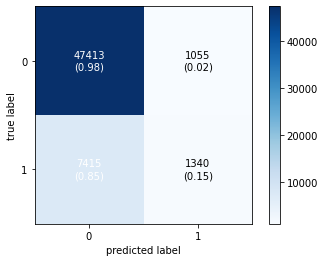

In [ ]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

# Logistic Regession
Features : HighBP, HighChol, BMI, HeartDiseaseorAttack, PhysActivity, GenHlth, PhysHlth, DiffWalk, Age

1.   Selected Features
2.   OneHot Encoding 
3.   Standard Scaler for PhysHlth
4.   manage imbalanced data with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=10)
X_r, y_r = sm.fit_resample(X_train, y_train)

In [ ]:
logreg = LogisticRegression(max_iter=1500)
logreg.fit(X_r, y_r)
print('Training set score: {:.4f}'.format(logreg.score(X_r, y_r)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7481
Test set score: 0.7196


              precision    recall  f1-score   support

           0       0.94      0.72      0.81     48468
           1       0.32      0.74      0.45      8755

    accuracy                           0.72     57223
   macro avg       0.63      0.73      0.63     57223
weighted avg       0.84      0.72      0.76     57223



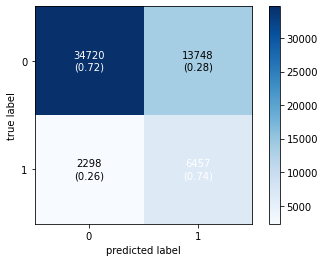

In [ ]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

# KNN Classification
Features : HighBP, HighChol, BMI, HeartDiseaseorAttack, PhysActivity, GenHlth, PhysHlth, DiffWalk, Age

1.   Selected Features
2.   OneHot Encoding 
3.   Standard Scaler for PhysHlth
4.   manage imbalanced data with SMOTE

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_r , y_r)
y_pred=knn.predict(X_test)
print('Training set score: {:.4f}'.format(knn.score(X_r, y_r)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))


Training set score: 0.7933
Test set score: 0.7790


              precision    recall  f1-score   support

           0       0.89      0.85      0.87     48468
           1       0.32      0.41      0.36      8755

    accuracy                           0.78     57223
   macro avg       0.61      0.63      0.61     57223
weighted avg       0.80      0.78      0.79     57223



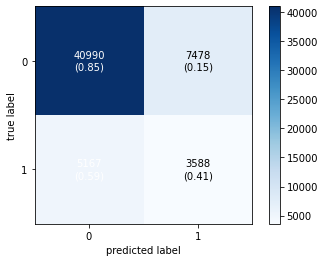

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

In [ ]:
#try ppolynomial
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape


(228890, 465)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_poly, y, random_state=99, stratify=y)

In [ ]:
logreg = LogisticRegression(max_iter=1500)
logreg.fit(X_train, y_train)
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8537
Test set score: 0.8528


              precision    recall  f1-score   support

           0       0.86      0.98      0.92     48468
           1       0.57      0.15      0.23      8755

    accuracy                           0.85     57223
   macro avg       0.72      0.56      0.58     57223
weighted avg       0.82      0.85      0.81     57223



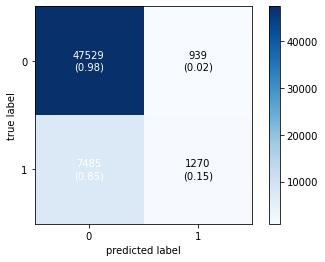

In [ ]:
from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from mlxtend.plotting import plot_confusion_matrix
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

In [ ]:
sm = SMOTE(k_neighbors=10)
X_r, y_r = sm.fit_resample(X_train, y_train)

In [ ]:
logreg = LogisticRegression(max_iter=1500)
logreg.fit(X_r, y_r)
print('Training set score: {:.4f}'.format(logreg.score(X_r, y_r)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7366
Test set score: 0.7063


              precision    recall  f1-score   support

           0       0.94      0.70      0.80     48468
           1       0.31      0.76      0.44      8755

    accuracy                           0.71     57223
   macro avg       0.63      0.73      0.62     57223
weighted avg       0.85      0.71      0.75     57223



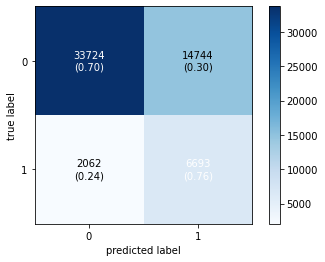

In [ ]:
from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from mlxtend.plotting import plot_confusion_matrix
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,Sex,Age,Education,Income,healthy weight,obesity_calss1,obesity_class2,obesity_class3,overweight,underweight
0,1,1,1,1,0,0,0,0,1,0,...,0,9,4,3,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,7,6,1,0,0,0,0,1,0
2,1,1,1,0,0,0,0,1,0,0,...,0,9,4,8,0,0,0,0,1,0
3,1,0,1,0,0,0,1,1,1,0,...,0,11,3,6,0,0,0,0,1,0
4,1,1,1,0,0,0,1,1,1,0,...,0,11,5,4,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,0,0,0,0,1,1,0,...,1,5,6,7,0,0,0,1,0,0
253676,1,1,1,0,0,0,0,0,0,0,...,0,11,2,4,0,0,0,0,0,1
253677,0,0,1,0,0,0,1,1,0,0,...,0,2,5,2,0,0,0,0,1,0
253678,1,0,1,0,0,0,0,1,1,0,...,1,7,5,1,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(228890, 351)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_poly, y, random_state=99, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=10)
X_r, y_r = sm.fit_resample(X_train, y_train)

In [ ]:
logreg = LogisticRegression(max_iter=2500)
logreg.fit(X_r, y_r)
print('Training set score: {:.4f}'.format(logreg.score(X_r, y_r)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set score: 0.7493
Test set score: 0.7190


              precision    recall  f1-score   support

           0       0.94      0.71      0.81     48468
           1       0.32      0.75      0.45      8755

    accuracy                           0.72     57223
   macro avg       0.63      0.73      0.63     57223
weighted avg       0.85      0.72      0.76     57223



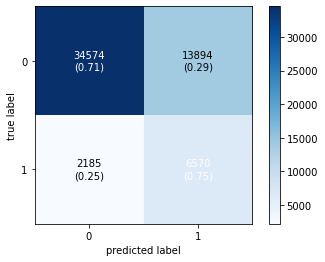

In [ ]:
from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from mlxtend.plotting import plot_confusion_matrix
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

In [ ]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'healthy weight', 'obesity_calss1', 'obesity_class2', 'obesity_class3',
       'overweight ', 'underweight'],
      dtype='object')

# Human Bias Selected Features
Features : HightBP, Age, bmi_cath

In [ ]:
X=X[['HighBP','Age','healthy weight', 'obesity_calss1',
     'obesity_class2', 'obesity_class3','overweight ', 'underweight']]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=99, stratify=y)

# Logistic Regression
Features : HightBP, Age, bmi_cath

1.   Human's Bias Selected Features
2.   OneHot Encoding for BMI


In [ ]:
logreg = LogisticRegression(max_iter=2500)
logreg.fit(X_train, y_train)
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8464
Test set score: 0.8469


              precision    recall  f1-score   support

           0       0.85      0.99      0.92     48468
           1       0.50      0.05      0.10      8755

    accuracy                           0.85     57223
   macro avg       0.68      0.52      0.51     57223
weighted avg       0.80      0.85      0.79     57223



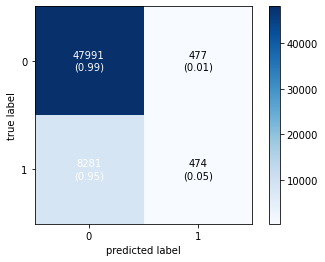

In [ ]:
from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from mlxtend.plotting import plot_confusion_matrix
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

# Logistic Regression
Features : HightBP, Age, bmi_cath

1.   Human's Bias Selected Features
2.   OneHot Encoding for BMI
3.   manage imbalanced data with SMOTE

In [ ]:
sm = SMOTE(k_neighbors=10)
X_r, y_r = sm.fit_resample(X_train, y_train)

In [ ]:
logreg = LogisticRegression(max_iter=2500)
logreg.fit(X_r, y_r)
print('Training set score: {:.4f}'.format(logreg.score(X_r, y_r)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6957
Test set score: 0.6724


              precision    recall  f1-score   support

           0       0.93      0.66      0.77     48468
           1       0.28      0.72      0.40      8755

    accuracy                           0.67     57223
   macro avg       0.60      0.69      0.59     57223
weighted avg       0.83      0.67      0.72     57223



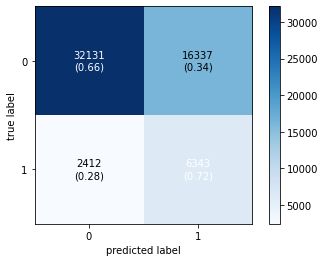

In [ ]:
from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from mlxtend.plotting import plot_confusion_matrix
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

In [ ]:
use_onehot.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'bmi_cath', 'healthy weight', 'obesity_calss1', 'obesity_class2',
       'obesity_class3', 'overweight ', 'underweight'],
      dtype='object')

In [ ]:
y = use_onehot["Diabetes_binary"]
X = use_onehot.drop(["BMI","bmi_cath"],axis=1)

#Try Machine Slected Features
use Recursive Features Selection ใน sklearn

In [ ]:
#Set estimator เป็น LogisticRegrssion(), step=1 เนื่องจากจะกำจัดรอบละ 1 features
from sklearn.feature_selection import chi2 , f_classif, RFE
from sklearn.feature_selection import SelectPercentile
rfe_selector = RFE(estimator=LogisticRegression(), step=1)
rfe_selector.fit(X, y)
print(rfe_selector.support_)
print(rfe_selector.ranking_)

[ True  True  True False  True False  True  True False False False False
 False False  True False  True  True]
[ 1  1  1  3  1  9  1  1  7 10  5  4  8  6  1  2  1  1]


In [ ]:
fe = rfe_selector.support_
selected_features=[]
for i in range(len(fe)):
    if fe[i]==True:
        selected_features.append(X.columns[i])
        

selected_features

['HighBP',
 'HighChol',
 'CholCheck',
 'HeartDiseaseorAttack',
 'HvyAlcoholConsump',
 'GenHlth',
 'healthy weight',
 'obesity_class2',
 'obesity_class3']

In [ ]:
X = X[selected_features]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=99, stratify=y)

# Logistic Regression
Features : 'HighBP', 'HighChol', 'CholCheck','HeartDiseaseorAttack','HvyAlcoholConsump', 'GenHlth',
 'healthy weight', 'obesity_class2', 'obesity_class3'

1.   Machine Selected Features


In [ ]:
logreg = LogisticRegression(max_iter=2500)
logreg.fit(X_train, y_train)
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8511
Test set score: 0.8518


              precision    recall  f1-score   support

           0       0.86      0.98      0.92     48468
           1       0.56      0.15      0.23      8755

    accuracy                           0.85     57223
   macro avg       0.71      0.56      0.58     57223
weighted avg       0.82      0.85      0.81     57223



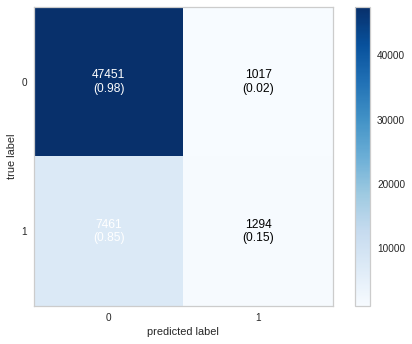

In [ ]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()

In [ ]:
sm = SMOTE(k_neighbors=10)
X_r, y_r = sm.fit_resample(X_train, y_train)

# Logistic Regression
Features : 'HighBP', 'HighChol', 'CholCheck','HeartDiseaseorAttack','HvyAlcoholConsump', 'GenHlth',
 'healthy weight', 'obesity_class2', 'obesity_class3'

1.   Machine Selected Features
2.   manage imbalanced data with SMOTE

In [ ]:
logreg = LogisticRegression(max_iter=2500)
logreg.fit(X_r, y_r)
print('Training set score: {:.4f}'.format(logreg.score(X_r, y_r)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7229
Test set score: 0.6999


              precision    recall  f1-score   support

           0       0.94      0.69      0.80     48468
           1       0.30      0.75      0.43      8755

    accuracy                           0.70     57223
   macro avg       0.62      0.72      0.61     57223
weighted avg       0.84      0.70      0.74     57223



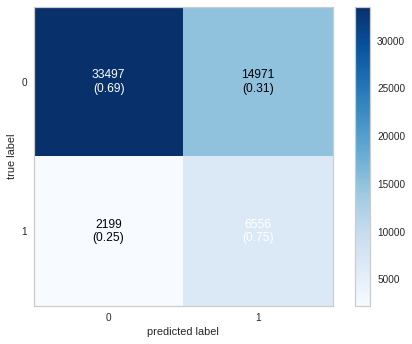

In [ ]:
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()